In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic acid']

In [7]:
df

,Class Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

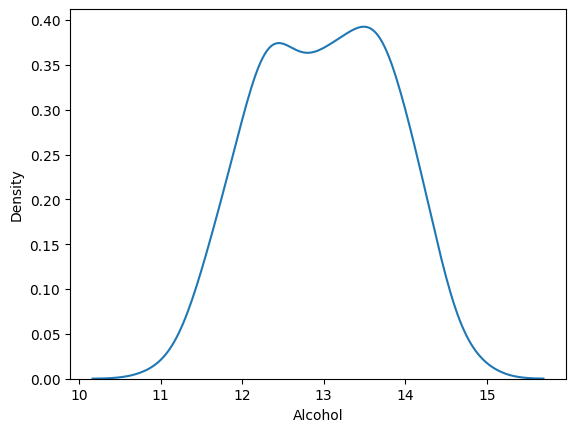

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

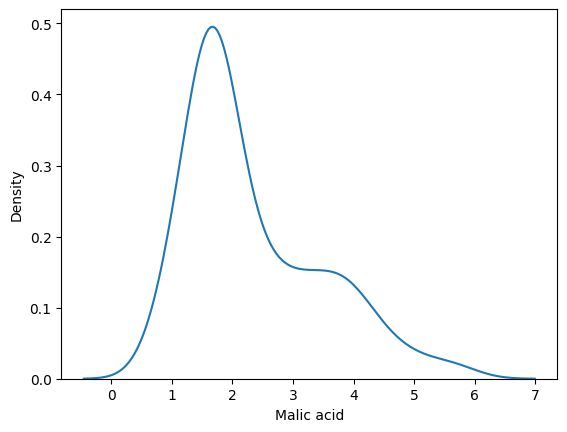

In [10]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

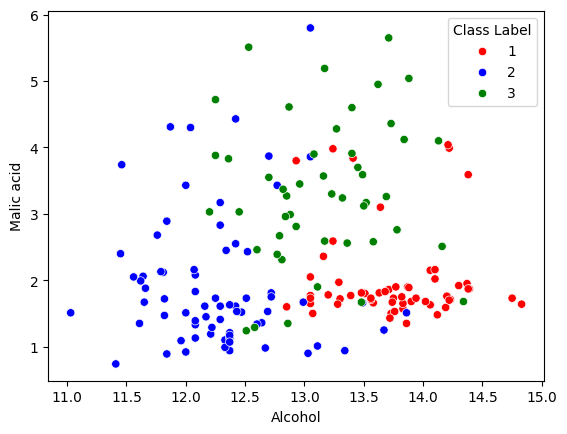

In [13]:
color_dict = {1: 'red', 2: 'blue', 3: 'green'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class Label'], palette=color_dict)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class Label',axis=1),
                                                    df['Class Label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [23]:
#min = 0 and max = 1 in each case
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


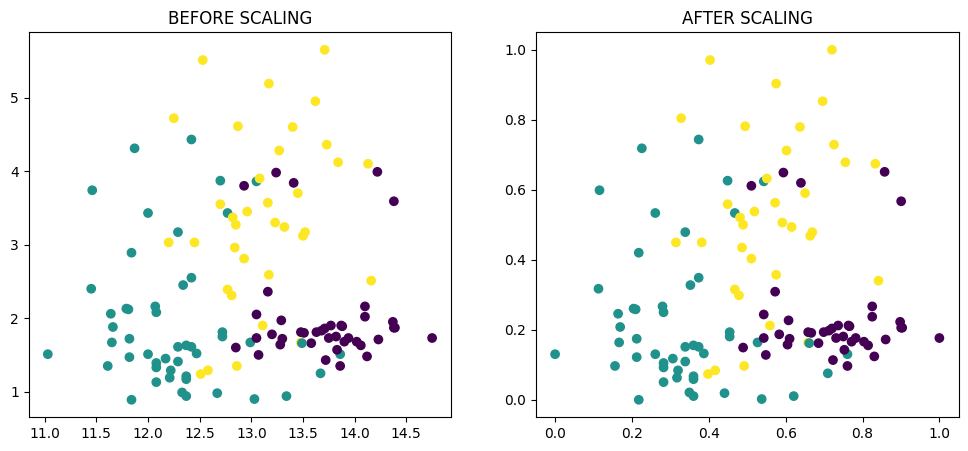

In [26]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title("BEFORE SCALING")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("AFTER SCALING")
plt.show()
#there is no major change in plots where there is change in scale

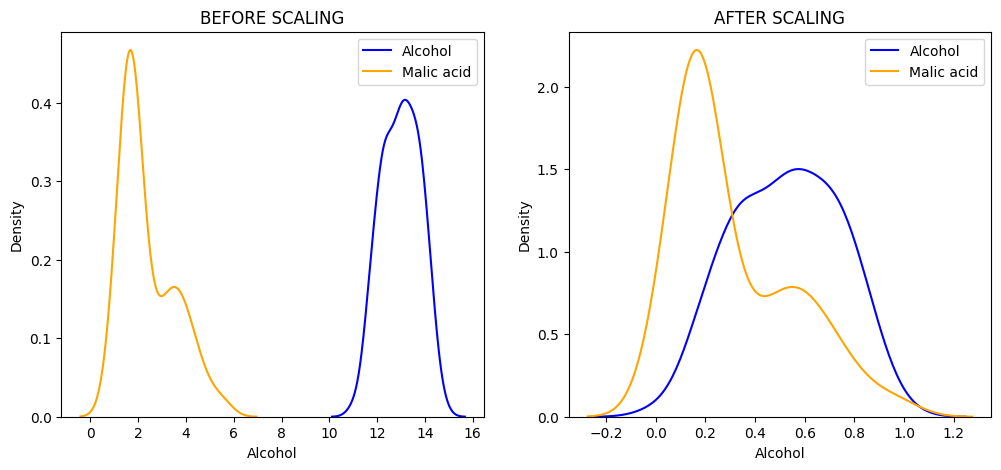

In [31]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("BEFORE SCALING")
sns.kdeplot(X_train['Alcohol'],ax=ax1,label='Alcohol',color='blue')
sns.kdeplot(X_train['Malic acid'],ax=ax1,label='Malic acid',color='orange')

#after scaling == comes in same range
ax2.set_title("AFTER SCALING")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,label='Alcohol',color='blue')
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2,label='Malic acid',color='orange')

ax1.legend()
ax2.legend()
plt.show()

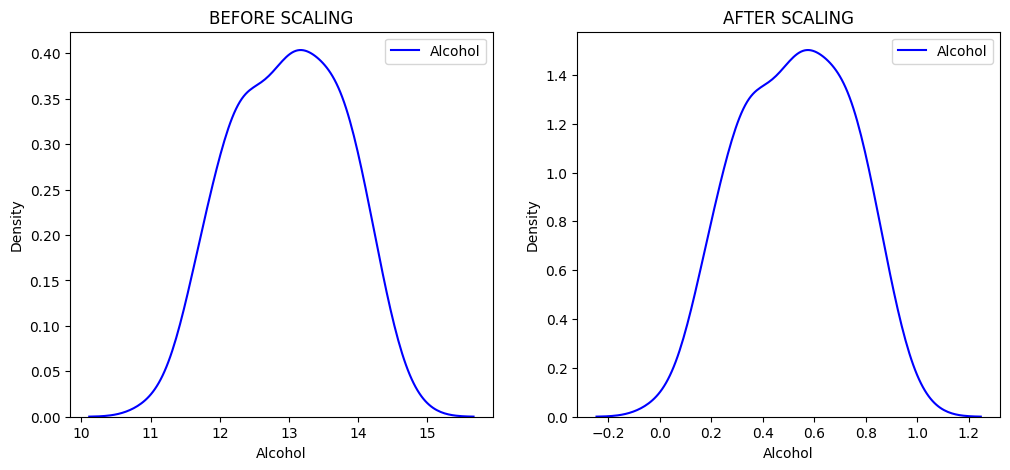

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title("BEFORE SCALING")
sns.kdeplot(X_train['Alcohol'],ax=ax1,label='Alcohol',color='blue')

#after scaling
ax2.set_title('AFTER SCALING')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,label='Alcohol',color='blue')

ax1.legend()
ax2.legend()
plt.show()

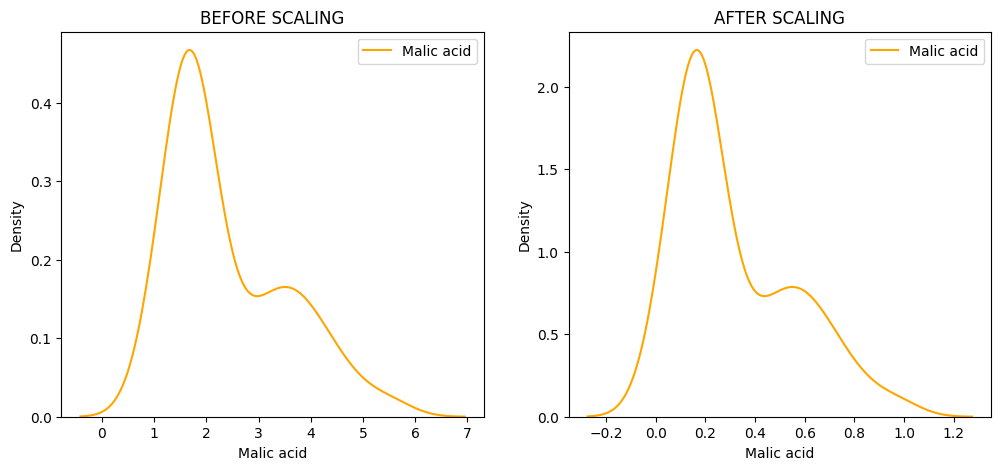

In [35]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title("BEFORE SCALING")
sns.kdeplot(X_train['Malic acid'],ax=ax1,label='Malic acid',color='orange')

#after scaling
ax2.set_title('AFTER SCALING')
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2,label='Malic acid',color='orange')

ax1.legend()
ax2.legend()
plt.show()